# Matematikai Algoritmusok és Felfedezések I.

## 7. Előadás: Numpy
### 2023 április 18.

### Tudományos csomagok (Python Scientific stack)
|   csomag |    |
| --- | --- |
| NumPy | Hatékony N-dimenziós tömb |
| SciPy | Numerikus számítások |
| Matplotlib | Grafikonok és rajzok  |
| IPython (Jupyter) | Interaktív notebook |
| SymPy | Szimbolikus számítások |
| Pandas | Adatbányászat |

# Numpy


A Python Scientific stack (és sok más) alap modulja. 

https://numpy.org/

* lineáris algebra, Fourier transzformáció, random számok,
* könnyen használható mátrixok, tömbök
* erősen opitmalizált
* C/C++/Fortran integráció.

## Mandelbrot halmaz

A Mandelbrot-halmaz azon $c$ komplex számokból áll, melyekre az alábbi $x_{n}$ rekurzív sorozat:

$x_{1}=c$

$x_{n+1}:=(x_{n})^{2}+c$

nem tart végtelenbe, azaz abszolút értékben (hosszára nézve) korlátos.


![mandelbrot](mandel.png)

### Importálási konvenció: `import numpy as np` 

In [4]:
import numpy as np

# N-dimenziós tömbök

A numpy központi objektuma az `ndarray` (_$n$-dimenziós tömb_).

In [5]:
A = np.array([[1, 2], [3, 4], [5, 6]])     
A

array([[1, 2],
       [3, 4],
       [5, 6]])

In [6]:
type(A)

numpy.ndarray

`A.shape` egy tuple a tömb dimenzióival, alakjával. 

In [8]:
A.shape

(3, 2)

### Többdimenzió
Többdimenziós tömbökkel sok helyen találkozhatunk. Egyik tipikus megjelenésük a képek tárolása. Minden tömb egy háromdimenziós tömb, ahol az első két dimenzió az x és y koordinátának felel meg, a harmadik mentén pedig felsoroljuk az RGB értékeket. Az RGB értékek 0 és 255 közötti egészek.  

In [14]:
import imageio                                  #kép beolvasáshoz
import matplotlib.pyplot as plt                 #kép megjelenítéshez

fig_size = plt.rcParams["figure.figsize"]       #kép méret növelése
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

dragon = imageio.imread('dragon.jpg')
print(type(dragon))

dragon.shape, dragon.dtype

<class 'imageio.core.util.Array'>


((453, 640, 3), dtype('uint8'))

In [15]:
dragon[0,0]

Array([255, 255, 255], dtype=uint8)

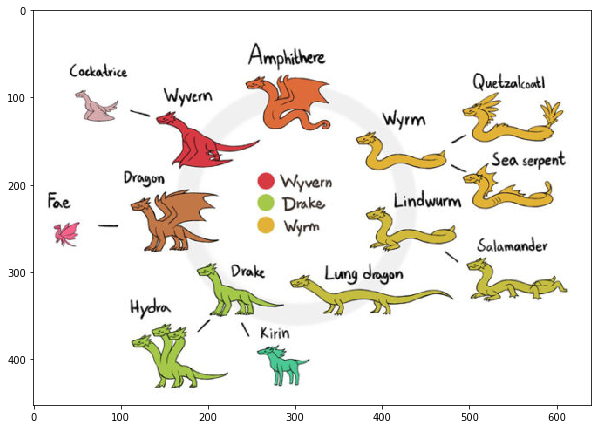

In [16]:
plt.imshow(dragon)
plt.show()

### dtype
A listákkal ellentétben nem tárolhatunk benne bármit!
A `dtype` megadja a tárolt elemek típusát

In [17]:
A.dtype

dtype('int32')

In [20]:
a=10**30            #Ez sima ügy
#A[0,0]=10**30      #Ez túl nagy lenne

In [21]:
A = np.array([1.5, 2])
A.dtype

dtype('float64')

Megadhatjuk a `dtype`-ot amikor létrehozzuk a tömböt.

In [22]:
np.array(['10', '20'], dtype="float32")

array([10., 20.], dtype=float32)

#### String tömbök

In [23]:
T = np.array(['körte', 'alma'])
print(T)
print(T.shape, T.dtype, type(T))

['körte' 'alma']
(2,) <U5 <class 'numpy.ndarray'>


**Fix hosszúságú karakter tömböket tárol!!**

In [24]:
T[1] = "banana"
T

array(['körte', 'banan'], dtype='<U5')

## Az elemek elérése

#### Egy sor:

In [25]:
A = np.array([[1, 2], [3, 4], [5, 6]])
A

array([[1, 2],
       [3, 4],
       [5, 6]])

In [19]:
A[0], A[1]

(array([1, 2]), array([3, 4]))

#### Egy oszlop:

In [20]:
A[:, 0]

array([1, 3, 5])

#### egy elem:

In [21]:
A[2][1], A[2, 1], type(A[2, 1])

(6, 6, numpy.int32)

#### néhány sor vagy oszlop 

In [30]:
A = np.array([[1, 2], [3, 4], [5, 6]])
A

array([[1, 2],
       [3, 4],
       [5, 6]])

In [31]:
A[:2]  # vagy A[:2, :]

array([[1, 2],
       [3, 4]])

In [28]:
A[:, 1:]

array([[2],
       [4],
       [6]])

In [32]:
A[::2]

array([[1, 2],
       [5, 6]])

In [33]:
B = np.array([[[1, 2, 3],[4, 5, 6]]])
B.shape,  B.ndim

((1, 2, 3), 3)

In [34]:
B

array([[[1, 2, 3],
        [4, 5, 6]]])

In [35]:
B[0].shape

(2, 3)

In [36]:
B[0, 1], B[0, 1].shape

(array([4, 5, 6]), (3,))

In [37]:
B[0, 1, 2]

6

# Operációk

## Elemenkénti műveletek

A leggyakrabban használt matematikai fügvények is elérhetőek és elemenként hatnak.

In [38]:
A = np.array([[1, 2], [3, 4], [5, 6]])
print(A)
A + A

[[1 2]
 [3 4]
 [5 6]]


array([[ 2,  4],
       [ 6,  8],
       [10, 12]])

In [39]:
A * A

array([[ 1,  4],
       [ 9, 16],
       [25, 36]])

In [40]:
print(np.exp(A))
print(np.sin(A*np.pi/6))
print(2**A)
print(1/A)

[[  2.71828183   7.3890561 ]
 [ 20.08553692  54.59815003]
 [148.4131591  403.42879349]]
[[5.00000000e-01 8.66025404e-01]
 [1.00000000e+00 8.66025404e-01]
 [5.00000000e-01 1.22464680e-16]]
[[ 2  4]
 [ 8 16]
 [32 64]]
[[1.         0.5       ]
 [0.33333333 0.25      ]
 [0.2        0.16666667]]


### Logikai műveletek

In [41]:
A=np.array([1,1,1,0]) & np.array([1,0,1,1]) 
A

array([1, 0, 1, 0], dtype=int32)

In [42]:
A=np.array([1,1,1,0]) | np.array([1,0,1,1]) 
A

array([1, 1, 1, 1], dtype=int32)

In [43]:
A = np.array([[1, 3], [2, 4]])
P = (A >= 2)
print(P)
print(P.dtype)

[[False  True]
 [ True  True]]
bool


## Indexelés listákkal (Advanced indexing)

Egy listával vagy tömbbel fogjuk megadni, hogy hanyadik elemeket szeretnénk.


In [44]:
B = np.array(["a","b","c","d","e","f","g"])

In [45]:
np.array([B[0],B[3],B[4],B[6]])

array(['a', 'd', 'e', 'g'], dtype='<U1')

In [46]:
B[[0,3,4,6]]            #gyorsabban ugyanaz

array(['a', 'd', 'e', 'g'], dtype='<U1')

In [47]:
B[np.array([0,3,4,6])]  #tömbbel ugyanaz

array(['a', 'd', 'e', 'g'], dtype='<U1')

Több dimenzióban komplikálódnak a dolgok.

Ha egyetlen index tömbbel indexelünk, annak elemei megfelelnek M első kordináta szerint vett elemeinek. 


In [48]:
M = np.arange(12).reshape(3,4)
M

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [49]:
np.array([[M[0],M[1]],[M[2],M[2]]])

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [ 8,  9, 10, 11]]])

In [51]:
M[np.array([[0,1],[2,2]])] #gyorsabban ugyanaz

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [ 8,  9, 10, 11]]])

Ha több index tömbbel indexelünk, akkor az első az első koordinátnak a második a másodiknak, ...  felel meg. 

In [52]:
np.array([M[0][2],M[1][2],M[1][0]])

array([2, 6, 4])

In [52]:
np.array([M[0,2],M[1,2],M[1,0]])

array([2, 6, 4])

In [54]:
M[np.array([0,1,1]),np.array([2,2,0])] #gyorsabban ugyanaz

array([2, 6, 4])

In [53]:
np.array([[M[0,1],M[1,0]],[M[2,1],M[2,3]]])

array([[ 1,  4],
       [ 9, 11]])

In [54]:
M[np.array([[0,1],[2,2]]),np.array([[1,0],[1,3]])]  #gyorsabban ugyanaz

array([[ 1,  4],
       [ 9, 11]])

In [55]:
M[:,[1,3]]

array([[ 1,  3],
       [ 5,  7],
       [ 9, 11]])

In [56]:
M[[1,2],:]

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

Többször is kiválaszthatjuk ugyanazt a sort vagy oszlopot:

In [59]:
M[[2,1,2],:]

array([[ 8,  9, 10, 11],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

Többdimenzióban még komplikáltabba a helyzet. https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html

## A tömb alakjának megváltoztatása

A `reshape` függvénnyel megváltoztathatjuk a tömb alakját anélkül, hogy a tartalmazott elemek megváltoznának, vagy akár lemásolódnának a hattérben. 

In [57]:
B = np.array([[[1, 2, 3], [4, 5, 6]]])
B.reshape((2, 3))

array([[1, 2, 3],
       [4, 5, 6]])

In [58]:
B.reshape((3, 2))

array([[1, 2],
       [3, 4],
       [5, 6]])

 `ValueError` hibát kapunk ha rosz alakot adunk meg.

In [64]:
#B.reshape(7)  # raises ValueError

In [62]:
np.array(range(6)).reshape((1, 2, 3))

array([[[0, 1, 2],
        [3, 4, 5]]])

Ha `-1`-et adunk meg, megpróbálja kitalálni, hogy annak a dimenziónak mekkorának kell lennie az elemek száma alapján.

In [65]:
X = np.array(range(12)).reshape((2, -1, 2))
print("X.shape:", X.shape)
print(X)

X.shape: (2, 3, 2)
[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]]


A `resize` akkor is működik, ha az elemek száma nem passzol. Ilyenkor töröl, vagy feltölt nullákkal. Magát a tömböt változtatja meg.

In [67]:
X = np.array([[1, 2], [3, 4]])
X.resize((5, 3))
X.resize((1, 2))
X

array([[1, 2]])

# Tömbök létrehozása

Ritkán akarjuk egyesével megadni az elemeket, ezért van egy csomó gyorsabb módszer:

* `arange`: range megfelelője csak nem listát hoz létre, hanem tömböt.
* `linspace`: egyenletesen felosztott intervallum
* `ones`, `ones_like`, csupa egyes
* `zeros`, `zeros_like`, csupa nulla
* `eye`: indetitás mátrix 2 dimenzióban
* `fromfunction` függvény alapján

Az `np.ones_like()` és `np.zeros_like()` függvények megtartják a formát és a `dtype`-ot!

In [68]:
np.arange(10), np.arange(10).shape

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), (10,))

In [69]:
np.arange(1, 21, 2).reshape(5, -1)

array([[ 1,  3],
       [ 5,  7],
       [ 9, 11],
       [13, 15],
       [17, 19]])

In [70]:
np.linspace(0, 4, 11)

array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ])

In [71]:
np.ones((3, 2)) 

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [72]:
np.zeros((2, 3, 2))

array([[[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]]])

In [74]:
A = np.arange(6).reshape(3, -1)
np.zeros_like(A)

array([[0, 0],
       [0, 0],
       [0, 0]])

In [76]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [77]:
np.eye(4, dtype=bool)

array([[ True, False, False, False],
       [False,  True, False, False],
       [False, False,  True, False],
       [False, False, False,  True]])

Az egyik leghasznosabb, hogy az indexek függvényében is definiálhatjuk a tömböt:

In [79]:
np.fromfunction(lambda i, j: i == j, (3, 3))

array([[ True, False, False],
       [False,  True, False],
       [False, False,  True]])

In [80]:
np.fromfunction(lambda i,j: 100*i+j, (5,5))

array([[  0.,   1.,   2.,   3.,   4.],
       [100., 101., 102., 103., 104.],
       [200., 201., 202., 203., 204.],
       [300., 301., 302., 303., 304.],
       [400., 401., 402., 403., 404.]])

## Tömbök összeragasztása

Bármelyik dimenzió szerint ragaszthatunk, ha megfelelőek a dimenziók.

In [90]:
A = np.arange(8).reshape(2, -1)
B = np.arange(8).reshape(2, -1)

np.concatenate((A, B), axis=0)

array([[0, 1, 2, 3],
       [4, 5, 6, 7],
       [0, 1, 2, 3],
       [4, 5, 6, 7]])

In [85]:
np.concatenate((A, B), axis=-1)  # utolsó dimenzió dimension

array([[0, 1, 2, 3, 0, 1, 2, 3],
       [4, 5, 6, 7, 4, 5, 6, 7]])

Mivel általában az első vagy második koordináta szerint ragasztunk, ezekre vannak rövidítések:

In [86]:
A = np.arange(6).reshape(2, -1)
B = np.arange(8).reshape(2, -1)

In [87]:
np.hstack((A, B))

array([[0, 1, 2, 0, 1, 2, 3],
       [3, 4, 5, 4, 5, 6, 7]])

In [91]:
A = np.arange(6).reshape(-1, 2)
B = np.arange(8).reshape(-1, 2)
print(A.shape, B.shape)

np.vstack((A, B))

(3, 2) (4, 2)


array([[0, 1],
       [2, 3],
       [4, 5],
       [0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

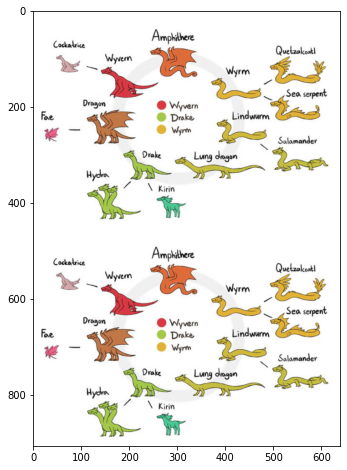

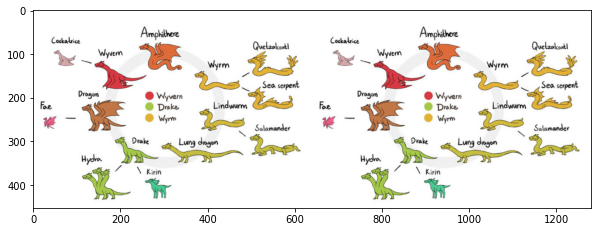

In [89]:
plt.imshow(np.vstack((dragon,dragon)))
plt.show()
plt.imshow(np.hstack((dragon,dragon)))
plt.show()


`np.stack` egy új dimenzió szerint egymás mellé rakja a tömböket

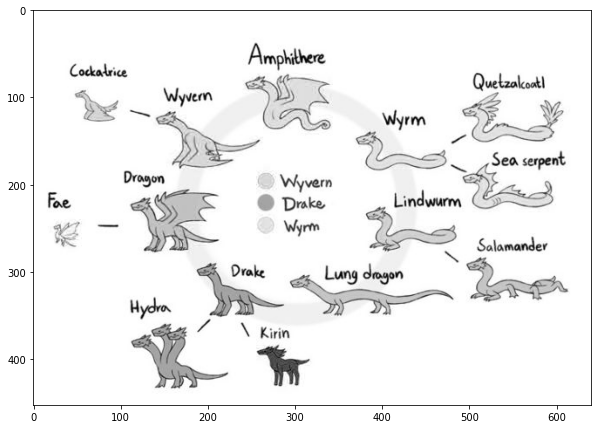

In [92]:
plt.imshow(np.stack((dragon[:,:,0],dragon[:,:,0],dragon[:,:,0]  ),axis=2 ))
plt.show() 


## Iteráció

Alapból az első koordináta szerint van iterálás:

In [93]:
A = np.arange(6).reshape(2, -1)
for row in A:
    print(row)

[0 1 2]
[3 4 5]


De természetesen csinálhatunk ilyet:

In [94]:
B = np.arange(6).reshape(1, 2, 3)

for x in B[0, 0, :]:
    print(x)

0
1
2


És végigiterálhatunk az összes elemen is:

In [95]:
for a in B.flat:
    print(a)

0
1
2
3
4
5


# Broadcasting

Különböző méretű tömbökkel is tudunk műveleteket végrehajtani, ha az alakjaik megfelelnek néhány feltételnek. 

Például egy $1\times 1$-es tömb összesorozható egy több dimenziós tömbbel, mintha skalárral szoroznánk.

In [96]:
s = 2.0 * np.ones((1, 1))
A=np.arange(12).reshape(3,4)
print(s)
print(A)
s * A

[[2.]]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


array([[ 0.,  2.,  4.,  6.],
       [ 8., 10., 12., 14.],
       [16., 18., 20., 22.]])

De különböző méretű tömbökön nem tudunk elemenkénti műveletet végrehajtani:

In [98]:
# np.ones((2,3)) + np.ones((3,2))

Azt, hogy mi történjen a  _broadcasting_ határozza meg. Ha valamelyik dimenzió mérete 1, akkor akkor az a dimenzió _brodacastolható_ , azaz olyan széles lehet a dimenzió, amit a művelet akar.

In [99]:
np.arange(3).reshape((1,3)) + np.zeros((2, 3))

array([[0., 1., 2.],
       [0., 1., 2.]])

In [100]:
np.arange(3).reshape((3,1)) + np.zeros((3, 4))

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.]])

Több dimenzió egyszerre is broadcastolható:

In [101]:
np.arange(3).reshape((1,3,1)) + np.zeros((2,3,5))

array([[[0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1.],
        [2., 2., 2., 2., 2.]],

       [[0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1.],
        [2., 2., 2., 2., 2.]]])

### Pontos működés

Ha mondjuk egy array alakja `(1,3,1)` akkor az első és a harmadik dimenzió broadcastolható. Ekkor egy `[x,y,z]` index hármast `[0,y,0]`-ként értelmez a Python. Tehát a broadcastolt dimenziókban 0-nak tekintjük az indexet. 

Nem létező dimenziókat is broadcastolhatunk, így lehet, hogy egy egydimenziós tömb összeadható egy két vagy háromdimenzióssal. Ekkor a hiányzó dimenziót elfelejtjük. Például egy ha az két tömb alakja `(k,)` és `(i, j, k)` és összadjuk őket akkor az `(a,b,c)` indexből `(c)` lesz. Tehát a kamu dimenziókat előre szúrjuk be.  


In [102]:
def test_broadcast(x, y):
    try:
        A = np.ones(x) + np.ones(y)
        print("Broadcastolható")
    except ValueError:
        print("Nem broadcastolható")

test_broadcast((3), (3,2,2))
test_broadcast((2), (3,2,2))
test_broadcast((3,1,4), (3,2,1))
test_broadcast((3,1,4), (3,2,2))

Nem broadcastolható
Broadcastolható
Broadcastolható
Nem broadcastolható


Meg is mondhatjuk, hogy hol hozzon létre új dimenziókat, a `none` kulcsszóval. 

In [104]:
(np.ones(3)[:, None, None] + np.ones((3,2,2)))

array([[[2., 2.],
        [2., 2.]],

       [[2., 2.],
        [2., 2.]],

       [[2., 2.],
        [2., 2.]]])

Tehát ekkor így változnak a dimenziók: `(3, None, None) + (3, 2, 2) = (3, 2, 2)`

#### Példa

Rács a komplex számsíkon:

In [59]:
np.arange(5)[:, None] + 1j * np.arange(5)[None, :]

array([[0.+0.j, 0.+1.j, 0.+2.j, 0.+3.j, 0.+4.j],
       [1.+0.j, 1.+1.j, 1.+2.j, 1.+3.j, 1.+4.j],
       [2.+0.j, 2.+1.j, 2.+2.j, 2.+3.j, 2.+4.j],
       [3.+0.j, 3.+1.j, 3.+2.j, 3.+3.j, 3.+4.j],
       [4.+0.j, 4.+1.j, 4.+2.j, 4.+3.j, 4.+4.j]])

# Tengely menti aggregálás 

Tengely menti szummázás:

In [60]:
Y = np.arange(24).reshape(2,3,4)
Y

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [61]:
Y.sum()  # összes elem összege

276

In [62]:
Y.sum(axis=0)

array([[12, 14, 16, 18],
       [20, 22, 24, 26],
       [28, 30, 32, 34]])

In [109]:
Y.sum(axis=1)

array([[12, 15, 18, 21],
       [48, 51, 54, 57]])

`mean, std, var` hasonlóan működik az átlag, szórás és szórásnégyzet  kiszámolására. 

In [110]:
Y.mean(),Y.std(),Y.var()

(11.5, 6.922186552431729, 47.916666666666664)

In [111]:
Y.mean(axis=(0, 2))

array([ 7.5, 11.5, 15.5])

## Indexelés Bool értékekkel 

Feltételnek megfelelő elemek kiválasztása:

In [63]:
A = np.random.random((4, 3))
print(A.mean())
A

0.6228087138922638


array([[0.54467361, 0.5599958 , 0.84042381],
       [0.85416772, 0.56236111, 0.37273231],
       [0.9296793 , 0.20723227, 0.67612133],
       [0.42977271, 0.84125342, 0.65529119]])

Az átlagnál nagyobb elemek: 

In [113]:
A[A > A.mean()]

array([0.91493591, 0.87884583, 0.64198532, 0.86508874, 0.63288018,
       0.81052287, 0.82354221])

In [114]:
A > A.mean()

array([[False,  True, False],
       [ True,  True, False],
       [ True,  True, False],
       [False,  True,  True]])

`np.where` visszatér azokkal a tömbökkel, amik a speckó indexeléshez kellenek, ha a feltételnek megfelelő elemeket akarjuk:

In [64]:
np.where(A > A.mean())

(array([0, 1, 2, 2, 3, 3], dtype=int64),
 array([2, 0, 0, 2, 1, 2], dtype=int64))

In [65]:
A[np.where(A > A.mean())]

array([0.84042381, 0.85416772, 0.9296793 , 0.67612133, 0.84125342,
       0.65529119])

## Mandelbrot halmaz

A Mandelbrot-halmaz azon $c$ komplex számokból áll, melyekre az alábbi $x_{n}$ rekurzív sorozat:

$x_{1}=c$

$x_{n+1}:=(x_{n})^{2}+c$

nem tart végtelenbe, azaz abszolút értékben (hosszára nézve) korlátos.

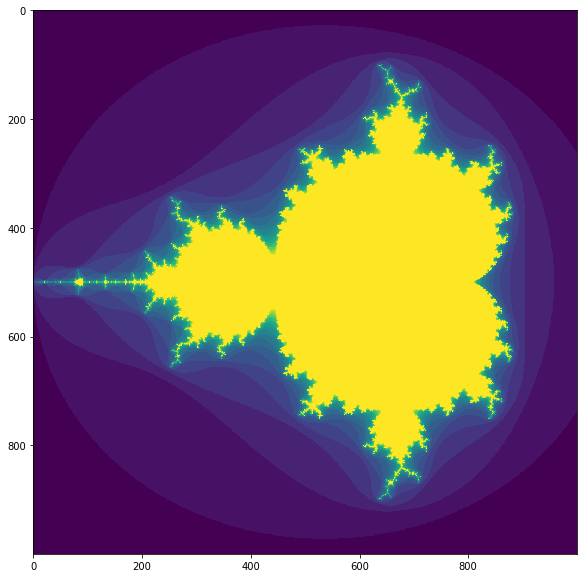

In [119]:
import matplotlib.pyplot as plt    #rajzoláshoz

def mandelbrot( h,w, maxit=20 ):
    c=(np.linspace(-1.4,1.4,h))[:, None]*1j + (np.linspace(-2,0.8,w))[None, :]
    z = c
    divtime = maxit + np.zeros(z.shape, dtype=int)
    for i in range(maxit):
        z = z**2 + c
        diverge = z*np.conj(z) > 2**2         # Ki divergál? 
        div_now = diverge & (divtime==maxit)  # Ki divergál ebben a lépésben?
        divtime[div_now] = i                  # felírjuk, hogy mikor divergált
        z[diverge] = 2                        # ne divárgáljunk túl sokat
    return divtime

# a többi a rajzoláshoz kell, most nem fontos
fig = plt.figure(figsize = (10,10))  
ax = fig.add_subplot(111)
ax.imshow(mandelbrot(1000,1000), interpolation='none')
plt.show()